In [47]:
import sys

sys.path.insert(0, '/Users/pschwendy/meep-1.25.0/python')
import math
import meep as mp
from meep import mpb
from meep.materials import cSi

num_bands = 8
#geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=12), center=mp.Vector3(1/3,1/3)), mp.Cylinder(0.2, material=mp.Medium(epsilon=12), center=mp.Vector3(2/3,2/3))]
# form triangles 
# FORM concave double triangle 
# draw out with matplotlib and draw geometry lattice
vertices = [mp.Vector3(1.675, -0.325 * math.sqrt(3)),
            mp.Vector3(0.675, 0.675 * math.sqrt(3)),
            mp.Vector3(0.325, 0.325 * math.sqrt(3)),
            mp.Vector3(-1.675,0.325 * math.sqrt(3)),
            mp.Vector3(-0.675, -0.675 * math.sqrt(3)),
            mp.Vector3(-0.325,-0.325 * math.sqrt(3))]

geometry = [mp.Prism(vertices, height=1.5, center=mp.Vector3(), material=cSi)]

resolution = 32


a = 4/3  # distance between nearest neighbors
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                                basis1=(0.5 * a * mp.Vector3(3, math.sqrt(3))),
                                basis2=(0.5 * a * mp.Vector3(3, -math.sqrt(3))))

k_points = [mp.Vector3(),              # Gamma
              mp.Vector3(y=0.5),          # M
              mp.Vector3(-1 / 3, 1 / 3),  # K
              mp.Vector3()]               # Gamma

k_points = mp.interpolate(4, k_points)

ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution,
                    deterministic=True)

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(-1./3, 1./3), mpb.fix_efield_phase,
          mpb.output_efield_z))
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 1)
Geometric objects:
     prism, center = (0,0,0)
          height 1.5, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (1.675,-0.562917,-0.75)
          (0.675,1.16913,-0.75)
          (0.325,0.562917,-0.75)
          (-1.675,0.562917,-0.75)
          (-0.675,-1.16913,-0.75)
          (-0.325,-0.562917,-0.75)
Geometric object tree has depth 1 and 9 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0,

Outputting fields to e.k11.b07.z.tm.h5...
Fixing e-field (band 8) phase by 0.502621 + -0.864507i; max ampl. = 1.31996
Outputting fields to e.k11.b08.z.tm.h5...
solve_kpoint (-0.266667,0.266667,0):
Solving for bands 1 to 8...
    linmin: converged after 1 iterations.
    iteration    1: trace = 12.14222222222277 (3.98008e-08% change)
Finished solving for bands 1 to 8 after 1 iterations.
tmfreqs:, 12, -0.266667, 0.266667, 0, 0.533333, 0.533333, 0.742369, 0.742369, 1.27192, 1.27192, 1.46667, 1.63843, 1.63843
elapsed time for k point: 0.05732393264770508
solve_kpoint (-0.2,0.2,0):
Solving for bands 1 to 8...
    linmin: converged after 1 iterations.
    iteration    1: trace = 11.6800000000001 (3.31546e-12% change)
Finished solving for bands 1 to 8 after 1 iterations.
tmfreqs:, 13, -0.2, 0.2, 0, 0.4, 0.4, 0.832666, 0.832666, 1.22202, 1.22202, 1.51438, 1.51438, 1.6
elapsed time for k point: 0.05321002006530762
solve_kpoint (-0.133333,0.133333,0):
Solving for bands 1 to 8...
    linmin: conv

tefreqs:, 5, 0, 0.4, 0, 0.46188, 0.46188, 0.69282, 1.00664, 1.00664, 1.44222, 1.44222, 1.61658, 1.61658
elapsed time for k point: 0.023222923278808594
solve_kpoint (0,0.5,0):
Solving for bands 1 to 8...
    linmin: converged after 1 iterations.
    iteration    1: trace = 12.66666666740691 (5.46642e-08% change)
Finished solving for bands 1 to 8 after 1 iterations.
tefreqs:, 6, 0, 0.5, 0, 0.57735, 0.57735, 0.57735, 1, 1, 1.52753, 1.52753, 1.52753, 1.73205
elapsed time for k point: 0.01820516586303711
solve_kpoint (-0.0666667,0.466667,0):
Solving for bands 1 to 8...
    near maximum in trace
    linmin: converged after 5 iterations.
    iteration    1: trace = 12.56888894976495 (1.154% change)
    linmin: converged after 1 iterations.
    iteration    2: trace = 12.56888889126899 (4.65403e-07% change)
Finished solving for bands 1 to 8 after 2 iterations.
tefreqs:, 7, -0.0666667, 0.466667, 0, 0.581187, 0.581187, 0.581187, 0.933333, 1.06667, 1.48474, 1.48474, 1.57198, 1.73333
elapsed time 

(16, 8)


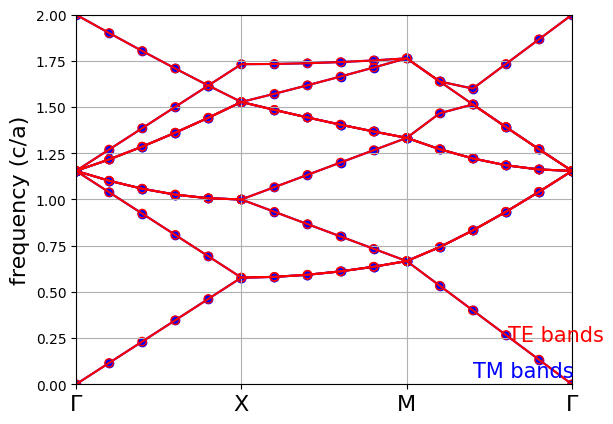

In [48]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
x = range(len(tm_freqs))
# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for xz, tmz, tez in zip(x, tm_freqs, te_freqs):
    ax.scatter([xz]*len(tmz), tmz, color='blue')
    ax.scatter([xz]*len(tez), tez, color='red', facecolors='none')
ax.plot(tm_freqs, color='blue')
ax.plot(te_freqs, color='red')
ax.set_ylim([0, 2])
ax.set_xlim([x[0], x[-1]])

print(tm_freqs.shape)

for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(12, 0.04, 'TM bands', color='blue', size=15)
ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'X', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 1)
Geometric objects:
     prism, center = (0,0,0)
          height 1.5, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (1.675,-0.562917,-0.75)
          (0.675,1.16913,-0.75)
          (0.325,0.562917,-0.75)
          (-1.675,0.562917,-0.75)
          (-0.675,-1.16913,-0.75)
          (-0.325,-0.562917,-0.75)
Geometric object tree has depth 1 and 9 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: tm.
Initializing fields to random numbers...
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<

tmfreqs:, 12, -0.266667, 0.266667, 0, 0.533333, 0.533333, 0.742369, 0.742369, 1.27192, 1.27192, 1.46667, 1.63843, 1.63843
elapsed time for k point: 0.024837970733642578
solve_kpoint (-0.2,0.2,0):
Solving for bands 1 to 8...
    linmin: converged after 1 iterations.
    switching to approximate line minimization (decrease time by 52.6171%)
    iteration    1: trace = 11.68000000000012 (3.61963e-12% change)
Finished solving for bands 1 to 8 after 1 iterations.
tmfreqs:, 13, -0.2, 0.2, 0, 0.4, 0.4, 0.832666, 0.832666, 1.22202, 1.22202, 1.51438, 1.51438, 1.6
elapsed time for k point: 0.0172119140625
solve_kpoint (-0.133333,0.133333,0):
Solving for bands 1 to 8...
    linmin: converged after 1 iterations.
    iteration    1: trace = 11.50222222222227 (3.55203e-13% change)
Finished solving for bands 1 to 8 after 1 iterations.
tmfreqs:, 14, -0.133333, 0.133333, 0, 0.266667, 0.266667, 0.933333, 0.933333, 1.18509, 1.18509, 1.39204, 1.39204, 1.73333
elapsed time for k point: 0.02015209197998047


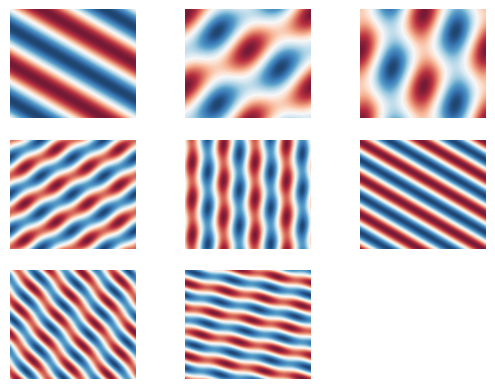

In [53]:
efields = []

def get_efields(ms, band):
    efields.append(ms.get_efield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(1 / -3, 1 / 3), mpb.fix_efield_phase,
          get_efields),)

# Create an MPBData instance to transform the efields
md = mpb.MPBData(rectify=True, resolution=32, periods=3)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

converted = []
for f in efields:
    # Get just the z component of the efields
    f = f[..., 0, 2]
    converted.append(md.convert(f))

for i, f in enumerate(converted):
    plt.subplot(331 + i)
    plt.contour(converted_eps.T, cmap='binary')
    plt.imshow(np.real(f).T, interpolation='spline36', cmap='RdBu', alpha=0.9)
    plt.axis('off')

plt.show()